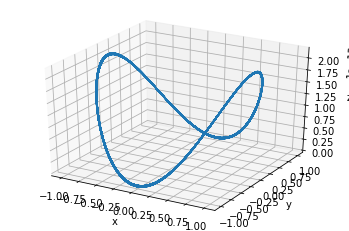

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Define constants
Ms = 8e5  # A/m
alpha = 0.01
eta = 0.6
Nx = 0.9468
Ny = 0.0339
Nz = 0.0193
a = 150e-9  # m
b = 100e-9  # m
t = 2e-9  # m
gamma = 2.21e5  # m/As

# Define simulation parameters
dt = 1e-12  # s
t_max = 2e-9  # s
n = int(t_max / dt) + 1

# Define initial magnetization
M = np.array([0, 1, 0])

# Define current
Ic = (2 * gamma * alpha * eta * Ms * t) / (1 + alpha**2)  # critical current
I = 2 * Ic  # current

# Define effective field
def H_eff(M):
    H_k = np.array([0, 0, -2 * t * Ms / (a * b)])
    H_ex = np.array([(Nx - Ny) * M[0], (Ny - Nz) * M[1], (Nz - Nx) * M[2]])
    H_stt = np.array([eta * I / (gamma * Ms * t), 0, 0])
    return H_k + H_ex + H_stt

# Define Runge-Kutta 4th order method
def RK4_step(M, dt):
    k1 = dt * np.cross(M, H_eff(M))
    k2 = dt * np.cross(M + 0.5 * k1, H_eff(M + 0.5 * k1))
    k3 = dt * np.cross(M + 0.5 * k2, H_eff(M + 0.5 * k2))
    k4 = dt * np.cross(M + k3, H_eff(M + k3))
    return M + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Simulate magnetization dynamics
M_arr = np.zeros((n, 3))
M_arr[0] = M

for i in range(n-1):
    M = RK4_step(M, dt)
    M_arr[i+1] = M

# Plot magnetization dynamics in 3D space
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M_arr[:, 0], M_arr[:, 1], M_arr[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


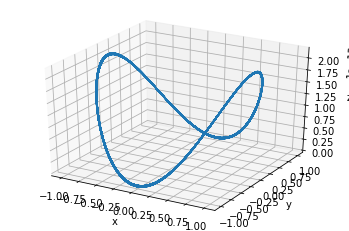

In [5]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Define constants
Ms = 8e5  # A/m
alpha = 0.01
eta = 0.6
Nx = 0.9468
Ny = 0.0339
Nz = 0.0193
a = 150e-9  # m
b = 100e-9  # m
t = 2e-9  # m
gamma = 2.21e5  # m/As

# Define simulation parameters
dt = 1e-12  # s
t_max = 2e-9  # s
n = int(t_max / dt) + 1

# Define initial magnetization
M = np.array([0, 1, 0])

# Define current
Ic = (2 * gamma * alpha * eta * Ms * t) / (1 + alpha**2)  # critical current
I = 2 * Ic  # current

# Define effective field
def H_eff(M):
    H_k = np.array([0, 0, -2 * t * Ms / (a * b)])
    H_ex = np.array([(Nx - Ny) * M[0], (Ny - Nz) * M[1], (Nz - Nx) * M[2]])
    H_stt = np.array([eta * I / (gamma * Ms * t), 0, 0])
    return H_k + H_ex + H_stt

# Define Runge-Kutta 4th order method
def RK4_step(M, dt):
    k1 = dt * np.cross(M, H_eff(M))
    k2 = dt * np.cross(M + 0.5 * k1, H_eff(M + 0.5 * k1))
    k3 = dt * np.cross(M + 0.5 * k2, H_eff(M + 0.5 * k2))
    k4 = dt * np.cross(M + k3, H_eff(M + k3))
    return M + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Simulate magnetization dynamics
M_arr = np.zeros((n, 3))
M_arr[0] = M

for i in range(n-1):
    M = RK4_step(M, dt)
    M_arr[i+1] = M

# Plot magnetization dynamics in 3D space
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(M_arr[:, 0], M_arr[:, 1], M_arr[:, 2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


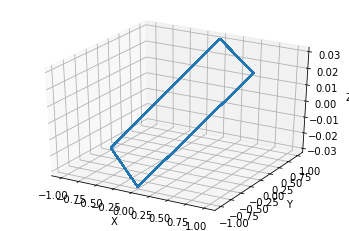

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
mu_0 = 4 * np.pi * 1e-7
h_bar = 1.0545718e-34
q = 1.60217662e-19

# Parameters
Ms = 4.8e5  # A/m
alpha = 0.1
eta = 0.6
HPMA = Ms
a, b, t = 20e-9, 20e-9, 5e-9
Nd = np.array([1 / (a * a), 1 / (b * b), -2 / (t * t)]) / mu_0
e = np.array([0, 1, 0])

# Initial state
theta = np.pi / 2  # Angle between magnetization and x-axis
phi = 0  # Angle between magnetization projection on x-y plane and x-axis
m = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])

# Simulation parameters
dt = 1e-12
Ic = 2 * (eta * h_bar / (2 * q * Ms * t)) / (mu_0 * Ms)
t_max = 5e-9
time = np.arange(0, t_max, dt)
M_arr = np.zeros((len(time), 3))
M_arr[0] = m

# Simulation loop
for i in range(1, len(time)):
    t = time[i]
    M = M_arr[i-1]
    I = np.sin(2 * np.pi * 1e9 * t) * Ic  # AC current with frequency 1GHz
    Heff = -1 * Nd * np.dot(M, Nd) * Ms + HPMA * np.array([0, 0, M[2]]) - eta * h_bar / (2 * q * Ms * t) * np.cross(M, np.cross(M, e)) * I
    dMdt = -gamma * np.cross(M, Heff) + alpha / (1 + alpha**2) * np.cross(M, np.cross(M, Heff))
    M += dMdt * dt
    M /= np.sqrt(np.dot(M, M))  # Normalize magnetization
    M_arr[i] = M

# Plot magnetization dynamics
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(M_arr[:, 0], M_arr[:, 1], M_arr[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
